<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Сергей! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

# Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

 В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
 
 
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Инструкция по выполнению проекта

* Разделите исходные данные на обучающую, валидационную и тестовую выборки.



* Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.



* Проверьте качество модели на тестовой выборке.



* Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from sklearn.linear_model import LogisticRegression 

In [2]:
try: 
    data = pd.read_csv('/Users/Sergej/Desktop/Practicum/Project_ml1/users_behavior.csv')
except: 
    data = pd.read_csv('/datasets/users_behavior.csv')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.

</div>

### 1) Посмотрим на датасет и разделим данные.
Вообще говоря, признаки могут быть разными, но мы возьмем все кроме `is_ultra`, его мы будем предсказывать. Все признаки нам подходят, потому что каждый столбец несет информацию, которая влияет на выбор тарифа. 

Затем разделим данные на обучающую, валидационную и тестовую выборки в соотношении 60% / 20% / 20% от общей выборки соответственно. 

In [3]:
display(data)
data.info()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Видно, что наш датасет уже подготовлен, он не содержит пропусков и неправильных форматов данных. Отметим, что количество пользоваталей тарифа "Ультра" более, чем в два раза меньше обычных пользователей.  

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: 
    
Небольшой EDA не помешает, так как это аналитический проект. В данном проекте датасет "чистенький", но кто знает какой датасет нас будет ждать завтра, надо быть готовым. Хотя бы info() и вывод по увиденному.
Плюс проверить датасет на сбалансированность таргетов, это бы дало информацию для train_test_split и помогло решить бонусное задание сразу. 


</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
Добавил небольшую проверку. Вроде, в задании было написано, что данные уже предобработанные, поэтому я решил это не делать. 
</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Данные чистые, поэтому с ними ничего делать не нужно, но посмотри на них всегда стоит




</div>


In [5]:
target = data['is_ultra']
features = data.drop(['is_ultra'], axis=1)

In [6]:
# сначала выделим 20% для тестовой выборки, 80% останется
features1, features_test, target1, target_test = train_test_split(
features, target, test_size=0.2, random_state=12345, stratify=target)

# затем из оставшейся выборки возьмем 33% для валидационной выборки и 67% для обучающей
features_train, features_valid, target_train, target_valid = train_test_split(
    features1, target1, test_size=0.33, random_state=12345, stratify=target1)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

- все правильно. random_state использован. 


<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут


- После разбиения лучше перестраховаться и использовать .shape, для контроля за корректностью разбиения



<div>
    
<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
Как я понял, этот параметр гарантирует нам, что процентное соотношение элементов классов таргета будет постоянным в выборках?
</div>
    



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:

Верно. Ты можешь в этом сам убедиться, если посмотришь на долю нулей и единиц в каждой новой выборке
    
</div>


### 2) Модель дерева с разными гиперпараметрами.
Будем менять параметр `max_depth` в диапазоне от 1 до 10

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Все импорты поднимаем наверх

</div>

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>
    
Перенес
</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


In [7]:
depths = list(range(1,21))
score_valid = []
score_train = []

for depth in depths: 
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    score_valid.append(accuracy_score(target_valid, predictions))
    
    predictions = model.predict(features_train)
    score_train.append(accuracy_score(target_train, predictions))

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле




<div class="alert alert-warning">


Совет: 



- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



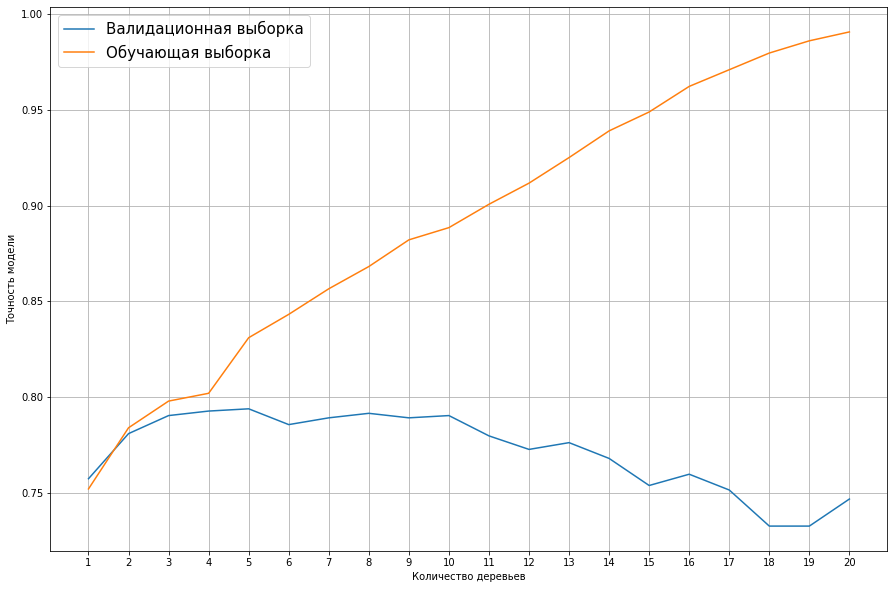

In [8]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()

ax.plot(depths, score_valid, label='Валидационная выборка')
ax.plot(depths, score_train, label='Обучающая выборка')

ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')

ax.grid()

plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend

plt.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


In [9]:
score_valid = list(zip(list(range(1,21)),score_valid))
print('Глубина и точность валидационной выборки (лучшая модель): ')
tree_depth = max(score_valid, key= lambda x: x[1])[0]
print(*max(score_valid, key= lambda x: x[1]), sep='; ')


# score_test = list(zip(list(range(1,11)),score_test))
# print('Глубина и точность тестовой выборки (лучшая модель): ')
# print(*max(score_test, key= lambda x: x[1]), sep='; ')

Глубина и точность валидационной выборки (лучшая модель): 
5; 0.7938751472320377


На графике точности от глубины дерева можем видеть, что модель достигает своей точности на 5 уровне, а далее начинает переобучаться и дает все больше неправильных ответов. 

### 3) Модель случайного леса с разными гиперпараметрами.
Будем перебирать количество деревьев леса путем изменения параметра `n_estimators`

CPU times: user 1min 21s, sys: 338 ms, total: 1min 21s
Wall time: 1min 21s


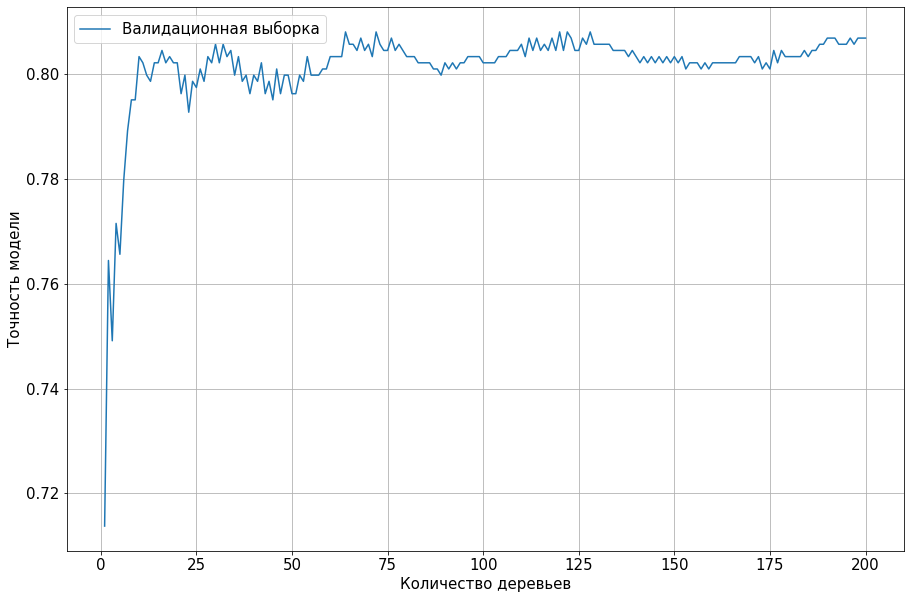

In [10]:
%%time
estimators = list(range(1,201))

score_test = []
score_valid = []
best_score=0
best_est=0
for est in estimators:
    model = RandomForestClassifier(n_estimators=est, random_state=12345)
    model.fit(features_train, target_train)
      
    predictions = model.predict(features_valid)
    score = model.score(features_valid, target_valid)
    score_valid.append(score)
    if score > best_score: 
        forest = model
        best_score = score 
        best_est = est
#     predictions = model.predict(features_test)
#     score_test.append(model.score(features_test, target_test))

    

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
ax.plot(estimators, score_valid, label='Валидационная выборка')
# ax.plot(estimators, score_test, label='Тестовая выборка')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')
ax.grid()
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend
plt.legend()


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Верно. 

<div class="alert alert-warning">

Совет:


- Сергей, можно было сделать похитрее, RF одна из лучших моделей в классическом machine-learning, поэтому можно было добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
 

- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))  А еще есть tqdm, показывает на каком этапе у нас работа в цикле происходит
    
   
- А еще можно вместо цикла использовать sklearn-ий встроенный функционал GridSearchCV. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_.  Это тема будущих теоретических занятий, но если есть время можешь сразу попробовать.



In [11]:
# print('Валидационная выборка:', round(max(score_test),3))
print('Валидационная выборка:', best_est, 'деревьев', ', точность -',round(best_score, 3))

Валидационная выборка: 64 деревьев , точность - 0.808


Для достижения оптимальной точности следует взять 64 дерева. При таком количестве мы получаем точность более 80%, более того, для 60 деревьев наш алгоритм будет работать гораздо быстрее, чем для 200. 

#### Проверка лучшей модели случайного леса на тестовой выборке. 
Обучим нашу модель на тренировочной и валидационной выборках и посмотрим на точность в тестовой выборке

In [12]:
train_features = pd.concat([features_valid, features_train]) 
train_target = pd.concat([target_valid, target_train])

In [13]:
forest.fit(train_features, train_target)
print('Точность на тестовой выборке:', round(forest.score(features_test, target_test), 3))

Точность на тестовой выборке: 0.804


Модель случайного леса показала точность 81%, этот показатель выше, чем у дерева решений.

### 3) Модель логистической регрессии с разными гиперпараметрами.

Будем изменять параметр `max_iter` в диапазаоне от 100 до 2000 с шагом 10.

In [14]:
iterations = list(range(90,510,10))
lg_test_score = []
lg_valid_score = []
best_score = 0
for iteration in iterations: 
    model = LogisticRegression(max_iter=iteration, solver='lbfgs', random_state=12345)
    model.fit(features_train, target_train)
    
    score = model.score(features_test, target_test)
    lg_valid_score.append(score)
    if score > best_score:  
        logistic = model

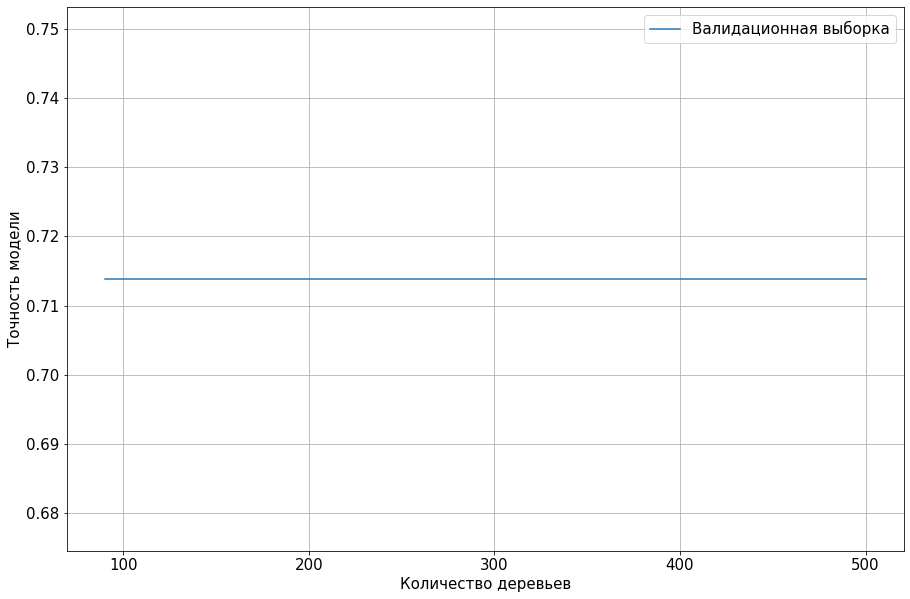

In [15]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
ax.plot(iterations, lg_valid_score, label='Валидационная выборка')
# ax.plot(iterations, lg_test_score, label='Тестовая выборка')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')
ax.grid()
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend
plt.legend()

In [16]:
print('Валидационная выборка:', round(max(lg_valid_score),3))

Валидационная выборка: 0.714


Модель логистической регрессии показывает одинаковую точность при max_iter >= 90. Точность модели 71,4% - этот показатель ниже, чем у дерева решений и модели случайного леса. 

###  Проверка лучшей модели на тестовой выборке.
В ходе тестирования на валидационной выборке выяснилось, что модель случайного леса имеет самую высокую точность. Возьмем эту подель для тестовой выборки.

In [17]:
forest.fit(train_features, train_target)
print('Точность на тестовой выборке:', round(forest.score(features_test, target_test), 3))

Точность на тестовой выборке: 0.804




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Успех:

Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Тобой подбиралась лучшая комбинация не по одному гиперпараметру и вот он результат!






</div>

На тестовой выборке модель показала приблизительно такую же высокую точность, как и на валидационной.


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
    
    

Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





## Проверка моделей на вменяемость. 

### Описание тарифов

#### Тариф «Смарт»

* Ежемесячная плата: 550 рублей

* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:
* Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

* Сообщение — 3 рубля.

* 1 Гб интернет-трафика— 200 рублей.

#### Тариф «Ультра»

* Ежемесячная плата: 1950 рублей

* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:

* Минута разговора — 1 рубль;

* Сообщение — 1 рубль;

* 1 Гб интернет-трафика: 150 рублей.


Возьмем данные, где значения столбца is_ultra = 0 и посмотрим, какая точность будет у наших моделей. Предполагается, модели должны вывести списки, где нули встречаются в большей степени.

In [18]:
tree = DecisionTreeClassifier(max_depth=5, random_state=12345)

data_train = data[data['is_ultra']==0]
check_features = data_train.drop(['is_ultra'], axis=1)
check_target = data_train['is_ultra']
tree.fit(train_features, train_target)

print('Точность лучшей модели дерева решений:', round(tree.score(check_features, check_target), 3))
print('Точность лучшей модели случайного леса:',round(forest.score(check_features, check_target), 3))
print('Точность модели логистической регрессии: ',round(logistic.score(check_features, check_target), 3))

Точность лучшей модели дерева решений: 0.938
Точность лучшей модели случайного леса: 0.984
Точность модели логистической регрессии:  0.986


#### Вменяемость

Проверка на самом частом классе is_ultra=0, показала, что модели дают вполне вменяемы результаты. Однако модель дерева решений справляется с тривальными тестами сложнее 93.8% правильных ответов, в отличие от моделей случайного леса и логистической регрессии. 




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

Сергей, бонусное на то и бонусное, но можешь попробовать его решить с моей подсказкой.    

Колючевое это помнить  что у нас дисбаланс в таргете (нулей гораздно больше чем единиц) и четко понимать как считается accuracy.
В чем смысл проверки модели на адекватность  при дисбалансе? Вот смотри - обучили мы какую то модель, которая на test показывает 90% accuraсy. Шикарная модель скажем мы. А если в датасете у нас в метках таргета единичек 99,9% (допустим тренируем на данных где 1 это "кирпич упал на голову человеку когда он вышел из дома"), а нулей 0,1% ("не упал")?! Все также утверждаем что наша модель шикарная?! Нет, потому что всегда можно предсказывать что не упадает (единички) и accuracy будет равна 99,9%

Вот и тут мы сравниваем нашу обученную модель с примитивным прогнозом самого частого таргета. Какой у нас самый частый класс? Нули. Так посмотри accuracy_score target_test и ряда из одних нулей. Сколько будет?. 


    
    

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей и сделает тоже самое что я описал на словах

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Совет:


Я всё-таки напишу верное решение бонусного задание. Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядит  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_test)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    



Сравниваем с accuracy нашей модели и делаем вывод

# Выводы

Было построено три модели с различными гиперпараметрами: дерево решений, случайный лес и логистическая регрессии.

* Оптимальным параметром глубины дерева решений является 5. При такой глубине модель выдает наиболее точные ответы. Точность правильных ответов на валидационной выборке 79%


* В процессе изменения количеста деревьев в модели случайного лесы было вявлено, что наибольшая точность достигается, при 64 деревьев, дальнешее увеличение числа деревьев не приводит к повышению точности. Стоит отметить, что модель случайного леса работает дольше двух остальных, но точность (порядка 81%) на валидационной и тестовой выборках у нее больше всех остальных моделей. 


* Для логистической регрессии при максимальном количестве итераций, превышающем 80, точность модели была неизменной - 71% 


* Все модели неплохо справились с тривиальными тестами, но стоит отметить, что модель дерева решений не так хорошо справилась с тестом, где все элементы принимали значение 0, она решила его только на 94%. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Здорово что в конце расписаны все этапы работы. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.



</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Сергей, у тебя старательно выполненная работа, все четко, осмысленно. Вижу у тебя получается в ML,  дальше будет интересней )  



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 





- использовать stratify
- добавить график метрики    
- посоветовал посмотреть в сторону GridSearchCV
- как можно улучшить результаты 




Замечания на будущее:
    

- Комментарии к коду отсутствуют - коллеги могут не понять хода твоих мыслей, пока вроде код простой, но стоит держать в голове что дальше код усложнится.  

 
    
Обязательное к исправлению:





- проект аналитический, поэтому минимальный EDA стоит сделать    


- нарушена логика использования выборок

    
    
   
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 





<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    



Что осталось из красного:

 
- Финальная проверка нашей лучшие модели это отдельный раздел проекта
    
    
- Финальное тестирование дела Только для лучшей модели    
    
    
На связи    
    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    

Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Сергей. Желаю успехов в дальнейшей учебе!

